# Pan Card Tampering Detection

#### The purpose of this project is to detect tampering of PAN card using computer vision. organization in detecting whether the Id i.e. the PAN card porovided to them by their employees or customers of anyone is original or not.

In [2]:
# import the necessary packages
from skimage.metrics import structural_similarity
import imutils
import cv2
from PIL import Image
import requests

In [3]:
# Open image and display
original = Image.open(f'images/original.jpg')
tampered = Image.open(f'images/tampered.jpg')

In [4]:
# The file format of the source file.
print("Original image format : ", original.format)
print("Tempered image format : ", tampered.format)
# Image size, in pixels. The size is given as a 2-tuple (width, height)

print("Original image format : ", original.size)
print("Tempered image format : ", tampered.size)

Original image format :  JPEG
Tempered image format :  JPEG
Original image format :  (250, 160)
Tempered image format :  (250, 160)


In [5]:
# Resize Image 
original = original.resize((250, 160))
print(original.size)
original.save('images/original.png')
tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save('images/tampered.png')

(250, 160)
(250, 160)


In [9]:
# Change image type if required form png to jpg
tampered = Image.open('images/tampered.jpg')
tampered.save('images/tampered.png')

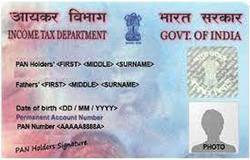

In [10]:
# Displa original image
original

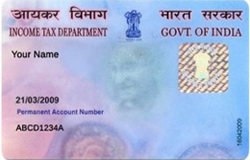

In [11]:
# Display user given image
tampered

In [13]:
# load the two imput images
original = cv2.imread('images/original.png')
tempered = cv2.imread('images/tampered.png')

In [15]:
# Convert the images to grayscale
original_gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
tampered_gray = cv2.cvtColor(tempered, cv2.COLOR_BGR2GRAY)

In [17]:
# Compute the Structural Similarity Index (SSIM) between the two images, ensirung that the difference image is returned
(score, diff) = structural_similarity(original_gray, tampered_gray, full=True)
diff = (diff * 255).astype('uint8')
print("SSIM: {}".format(score))

SSIM: 0.2952677730856737


In [18]:
# Calculating threshold and contours
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [20]:
#loop over the contours
for c in cnts:
    #applying contours on image
    (x,y,w,h) = cv2.boundingRect(c)
    cv2.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
    cv2.rectangle(tempered, (x,y), (x+w, y+h), (0,0,255), 2)    

Original Format Image


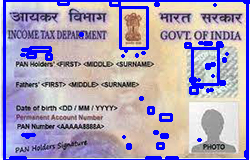

In [22]:
# Display original image with contour
print('Original Format Image')
Image.fromarray(original)

Tampered Image


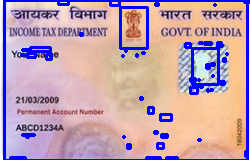

In [24]:
# Display tampered image with contour
print('Tampered Image')
Image.fromarray(tempered)

Different Image


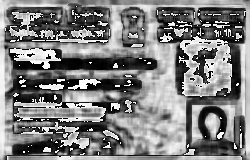

In [25]:
# Display threshold imae with black
print('Different Image')
Image.fromarray(diff)

Threshold Image


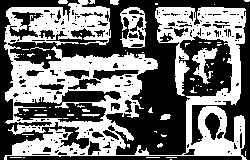

In [26]:
#Display threshold image with white
print('Threshold Image')
Image.fromarray(thresh)

## Summary

#### Finding out structural similarity of the images helped as in finding the diffrence or similarity in the shape of the images.                Similarly, findind out the threshold and contours based on those threshold for the images converted into grayscale binary also helped us in shape analysis and recognition.

#### As, our SSIM is ~29.5% we can say that the image user provied is fake or tampered.

#### Finally we visualized the differences and similaritieis between the images using by displaying the images with contours, differnce and threshold.

## Scope

#### This project can be used if different organizations where customers or users need to provide any kind of id in order to get themselves verified. The origanization can use this project to find out whether the ID is original or fake. Similarly this can be used for any type of ID like adhar, voter id, etc.